###   ML model to evaluate the characters of personality

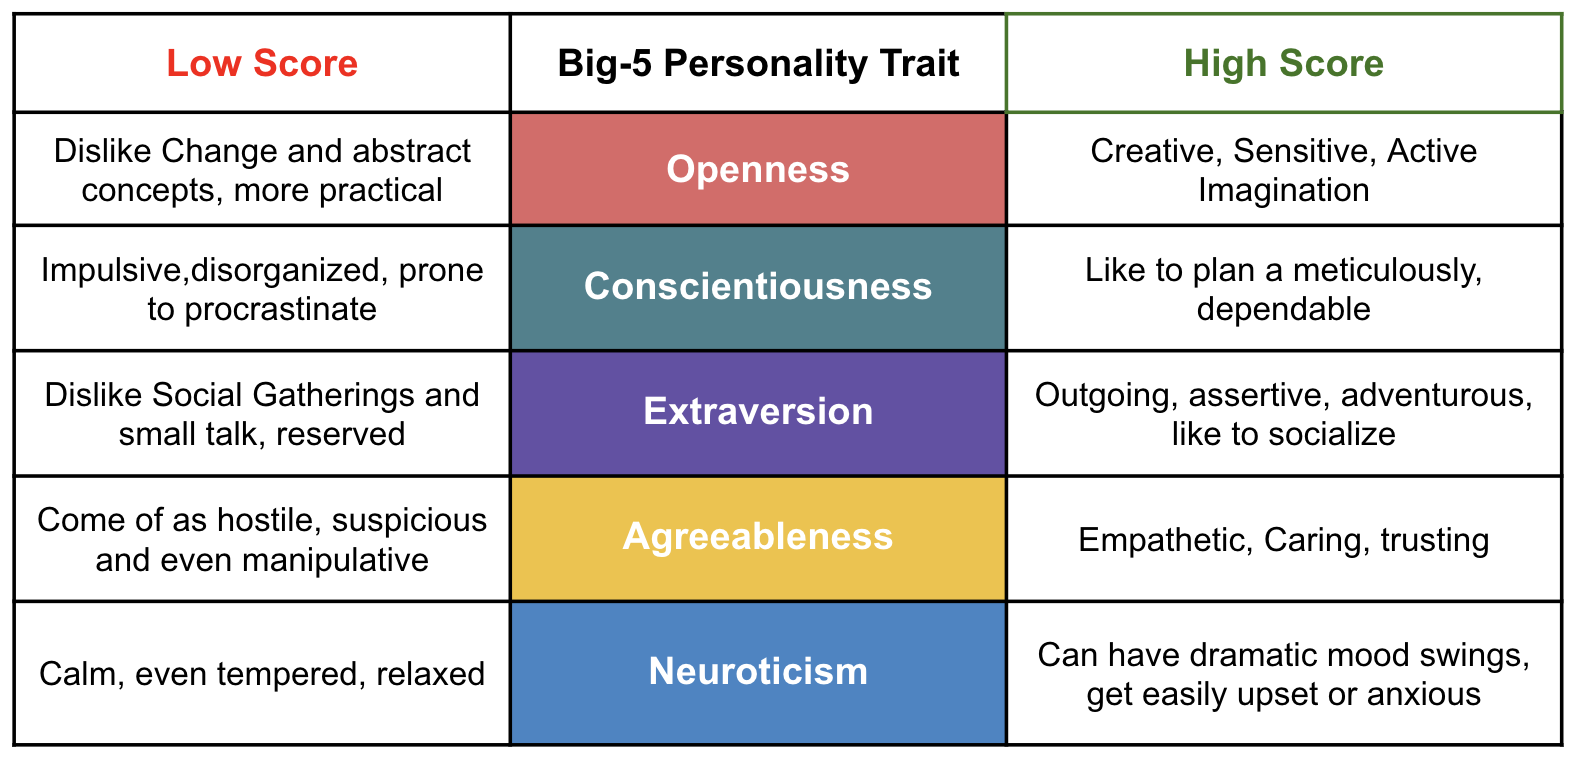

### The increasing availability of high-dimensional, fine-grained data about human behavior, gathered from mobile sensing studies and in the form of digital footprints, is poised to drastically alter the way personality psychologists perform research and undertake personality assessment. These new kinds and quantities of data raise important questions about how to analyze the data and interpret the results appropriately. Machine learning models are well-suited to these kinds of data, allowing researchers to model highly complex relationships and to evaluate the generalizability and robustness of their results using resampling methods. The correct usage of machine learning models requires specialized methodological training that considers issues specific to this type of modeling

### importing the necessary packages for importing the data 

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 

### importing the dataset and creating a copy of the dataset so that it don't get damaged  

In [5]:
data_raw = pd.read_csv('data-final.csv',sep='\t')
data = data_raw.copy()
pd.options.display.max_columns = 150

### dropping unnessisary columns  

In [6]:
data.drop(data.columns[50:107], axis=1,inplace=True)
data.drop(data.columns[51:],axis=1,inplace=True)

### running some prepressing methods to get to know the data set 

In [7]:
print('number of participants :' , len(data))
data.head()

number of participants : 1015341


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE


### finding how many values are of null values and dropping them to value zero  

In [10]:
print("is there any missing value? ", data.isnull().values.any())
print('how many missing values?', data.isnull().values.sum())
data.dropna(inplace=True)
print('number of participants after eliminating missing values :',len(data))

is there any missing value?  True
how many missing values? 89227
number of participants after eliminating missing values : 1013481


### visualizing the distribution of countries over the particpants  

Text(0, 0.5, 'participants')

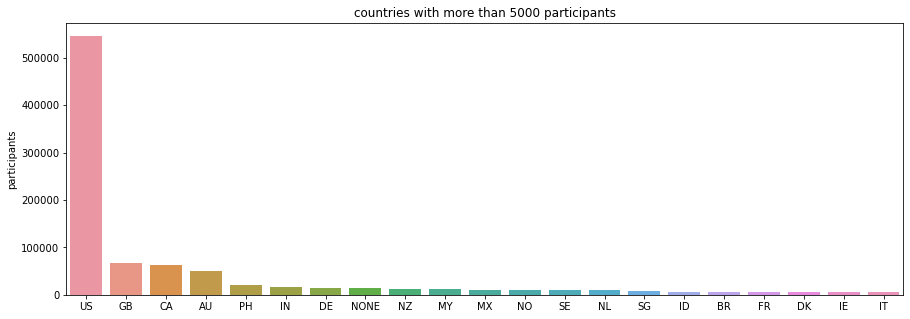

In [14]:
countries=pd.DataFrame(data['country'].value_counts())
countries_5000 = countries[countries['country']>=5000]
plt.figure(figsize=(15,5))
sns.barplot(data=countries_5000, x = countries_5000.index,y='country')
plt.title('countries with more than 5000 participants')
plt.ylabel('participants')

### swapping the appriviated columns names to some understandable format  , this part was from the help https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjG54aPp5f1AhXBDmMBHfaVAJgQFnoECAgQAQ&url=https%3A%2F%2Fwww.kaggle.com%2Framontanoeiro%2Fbig-five-personality-test-clustering%2Fdata&usg=AOvVaw1ZdTer2Uv8TMeAfIBEFGq8

In [16]:
 #Groups and Questions
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}

# Group Names and Columns
EXT = [column for column in data if column.startswith('EXT')]
EST = [column for column in data if column.startswith('EST')]
AGR = [column for column in data if column.startswith('AGR')]
CSN = [column for column in data if column.startswith('CSN')]
OPN = [column for column in data if column.startswith('OPN')]

###  more easier way to visaulize the part of the dataset by passing some parameters 

In [17]:
# Defining a function to visualize the questions and answers distribution
def vis_questions(groupname, questions, color):
    plt.figure(figsize=(40,60))
    for i in range(1, 11):
        plt.subplot(10,5,i)
        plt.hist(data[groupname[i-1]], bins=14, color= color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=18)

Q&As Related to Extroversion Personality


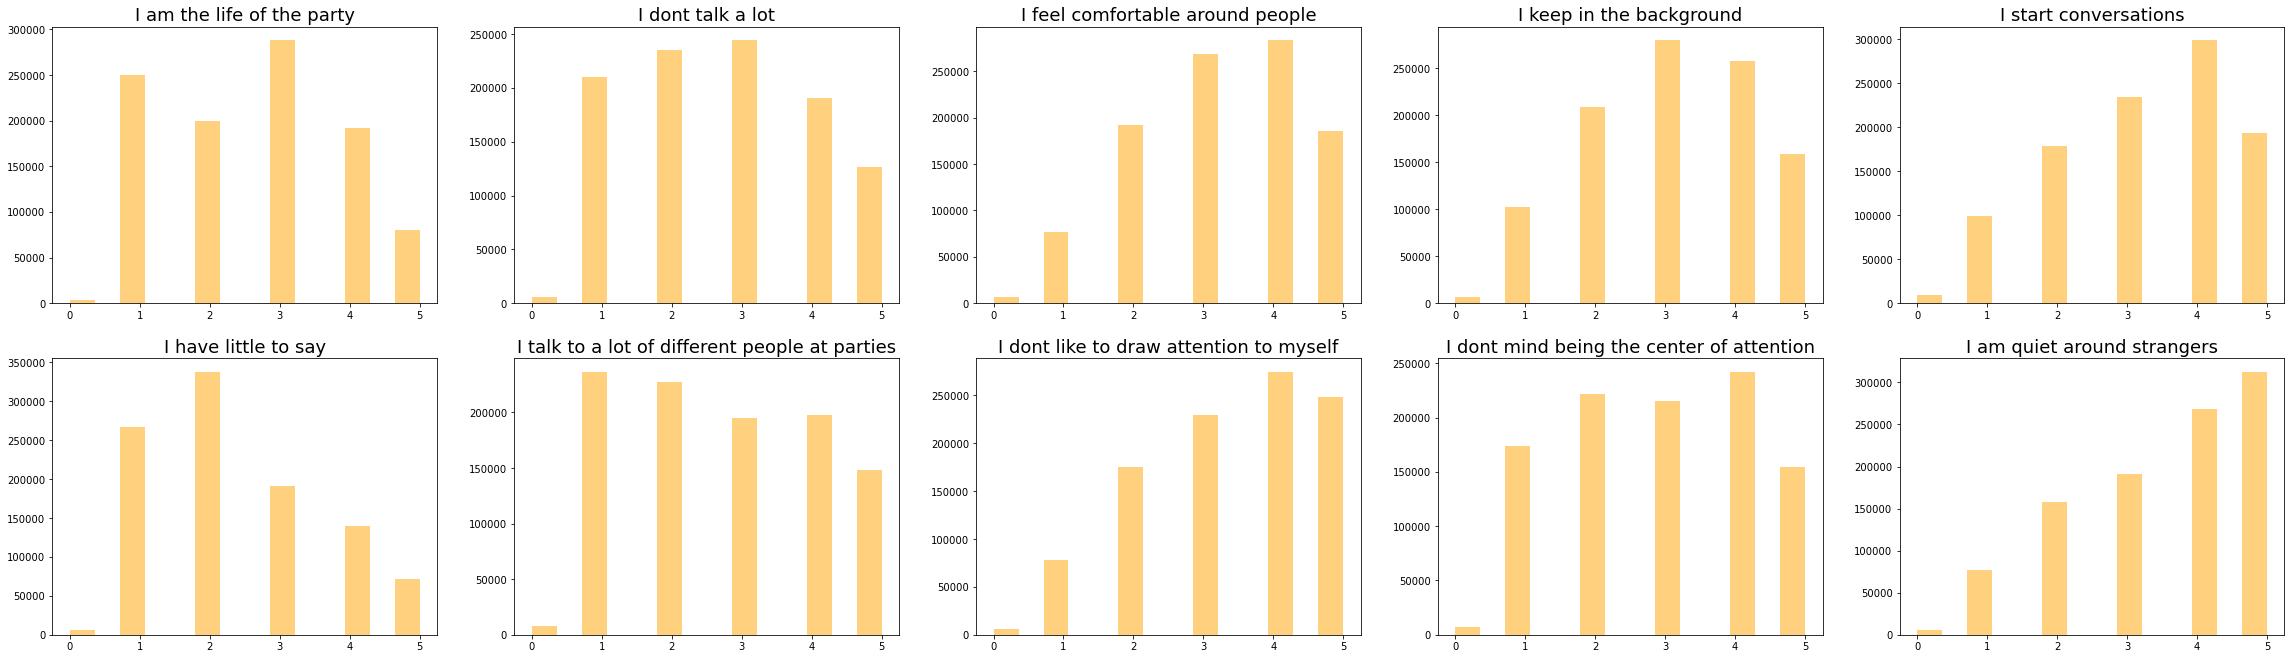

In [18]:
print('Q&As Related to Extroversion Personality')
vis_questions(EXT, ext_questions, 'orange')

Q&As Related to Neuroticism Personality


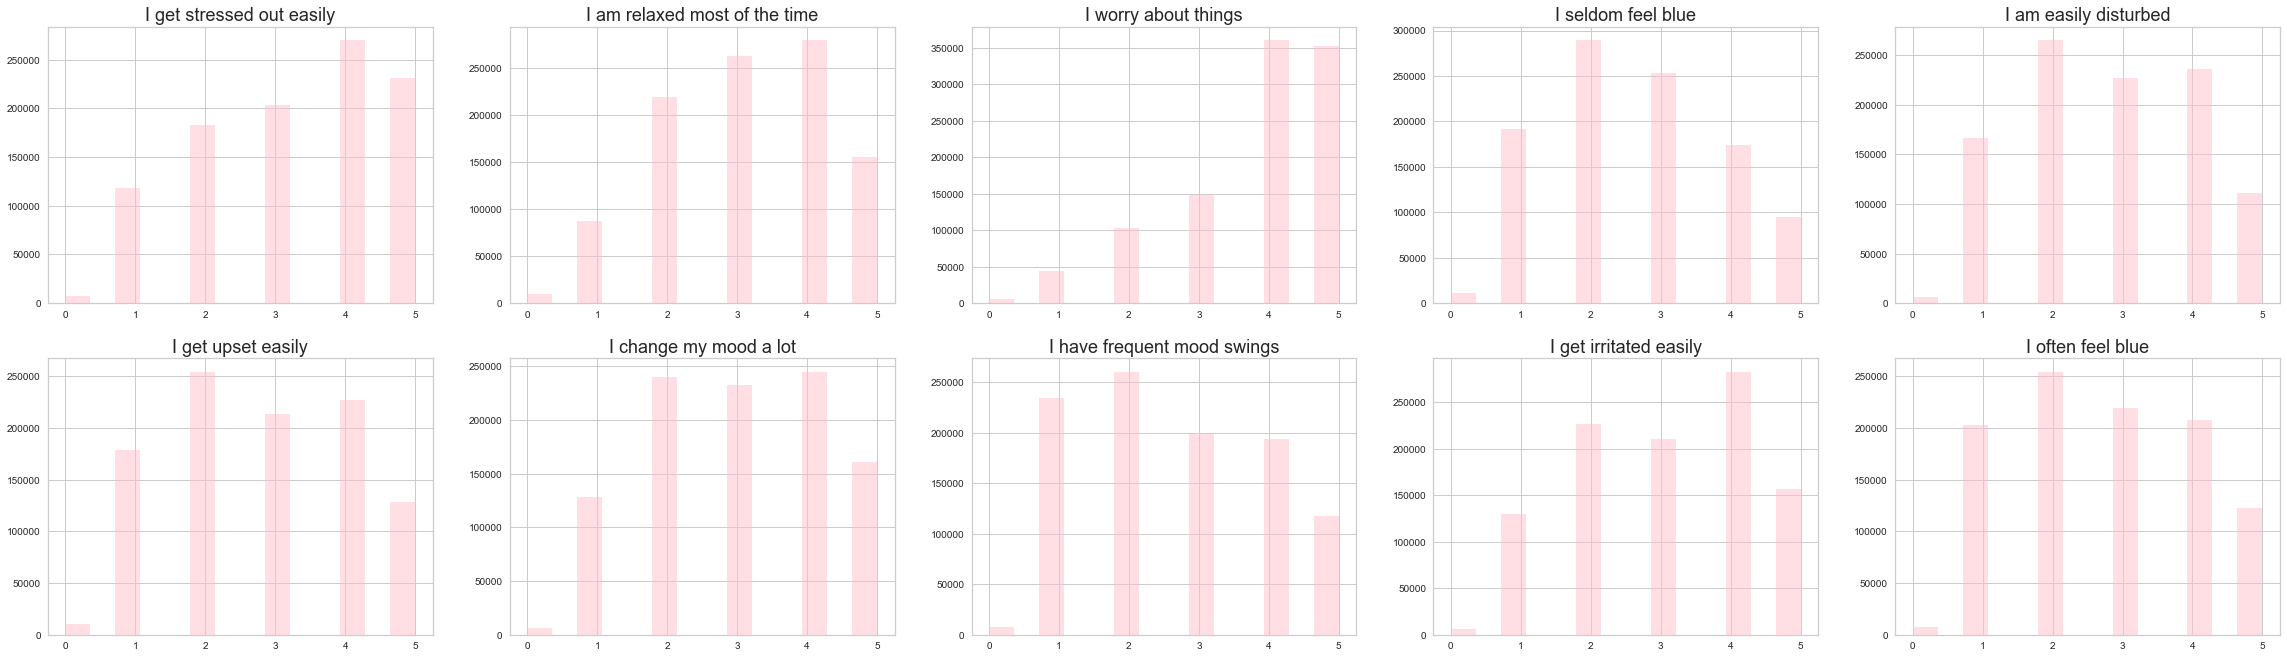

In [39]:
print('Q&As Related to Neuroticism Personality')
vis_questions(EST, est_questions, 'pink')

Q&As Related to Agreeable Personality


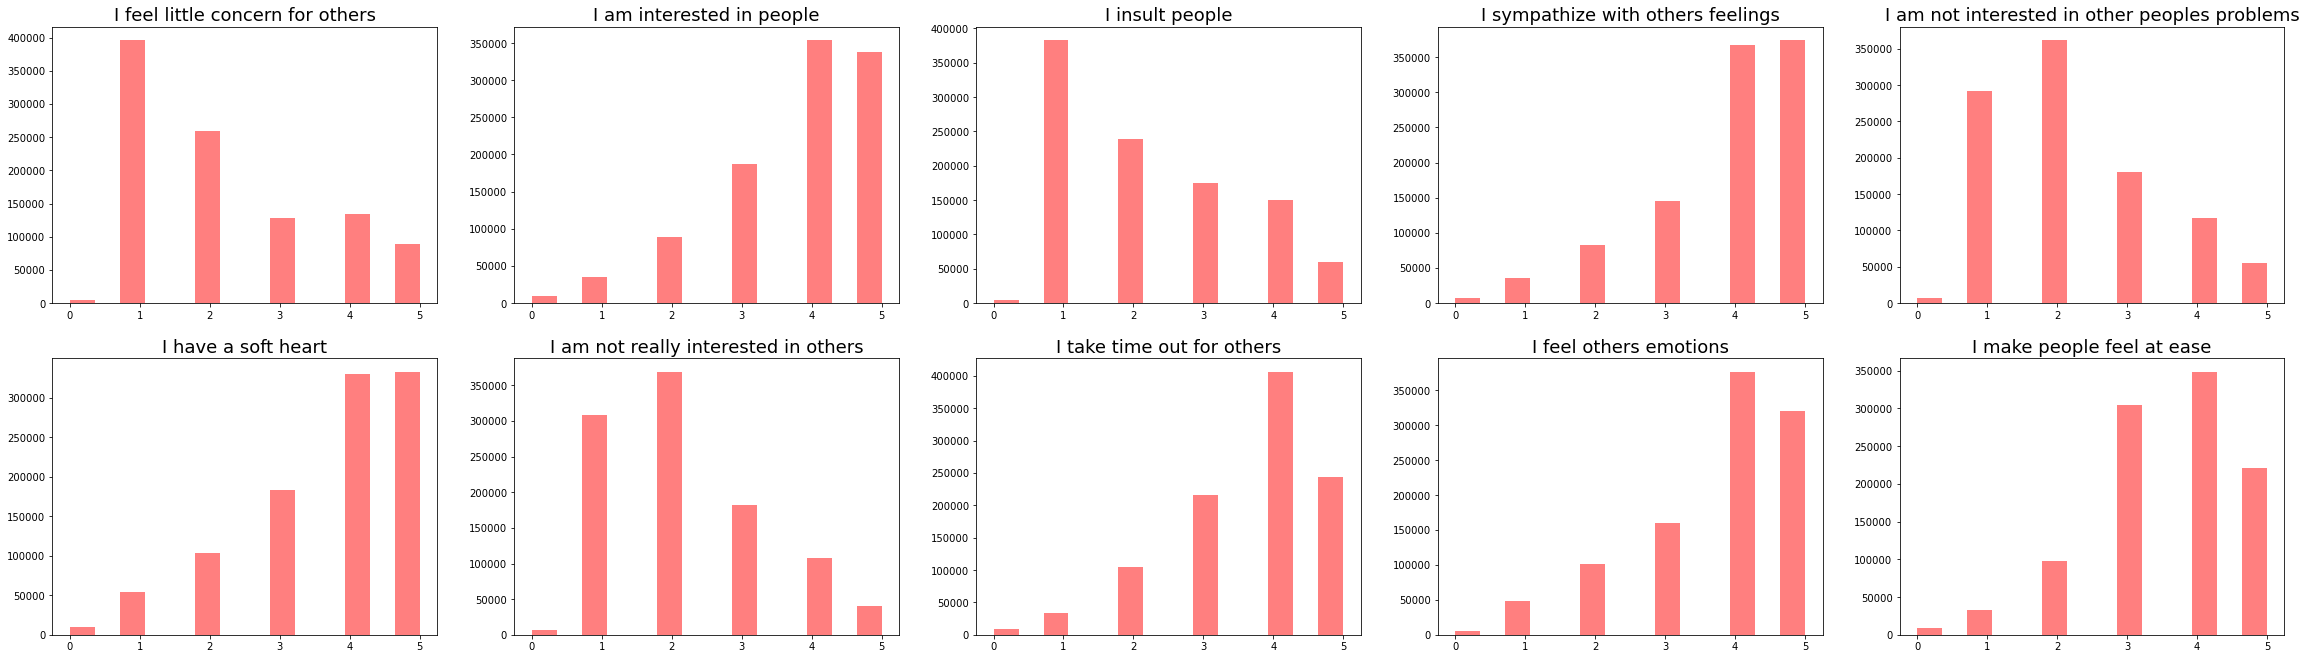

In [20]:
print('Q&As Related to Agreeable Personality')
vis_questions(AGR, agr_questions, 'red')

Q&As Related to Conscientious Personality


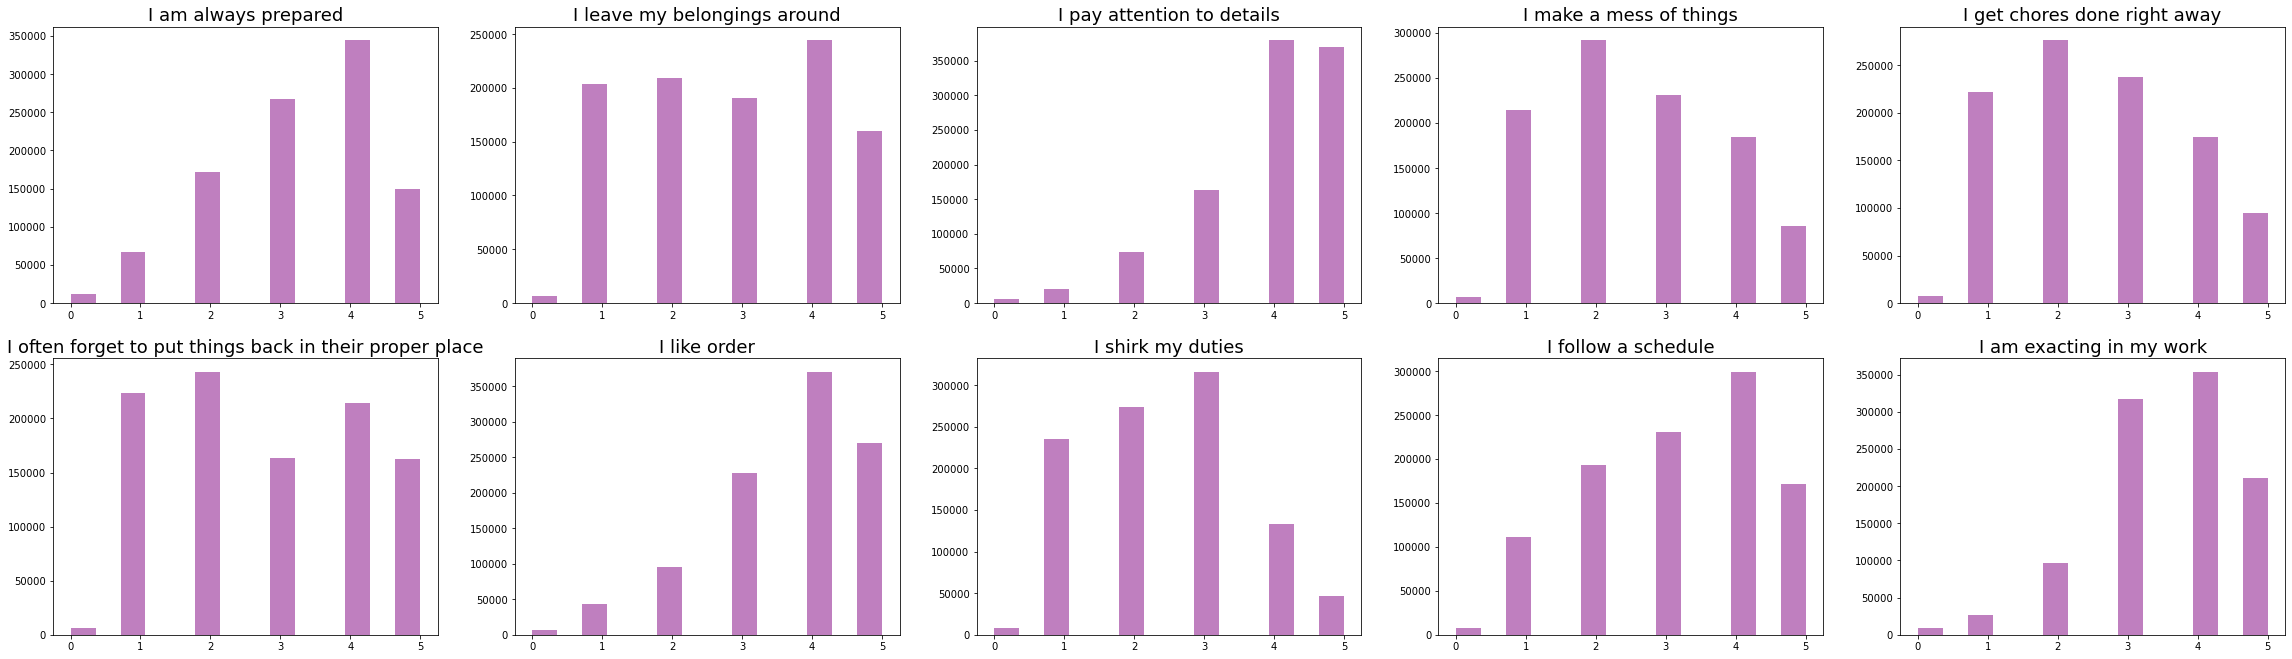

In [21]:
print('Q&As Related to Conscientious Personality')
vis_questions(CSN, csn_questions, 'purple')

Q&As Related to Open Personality


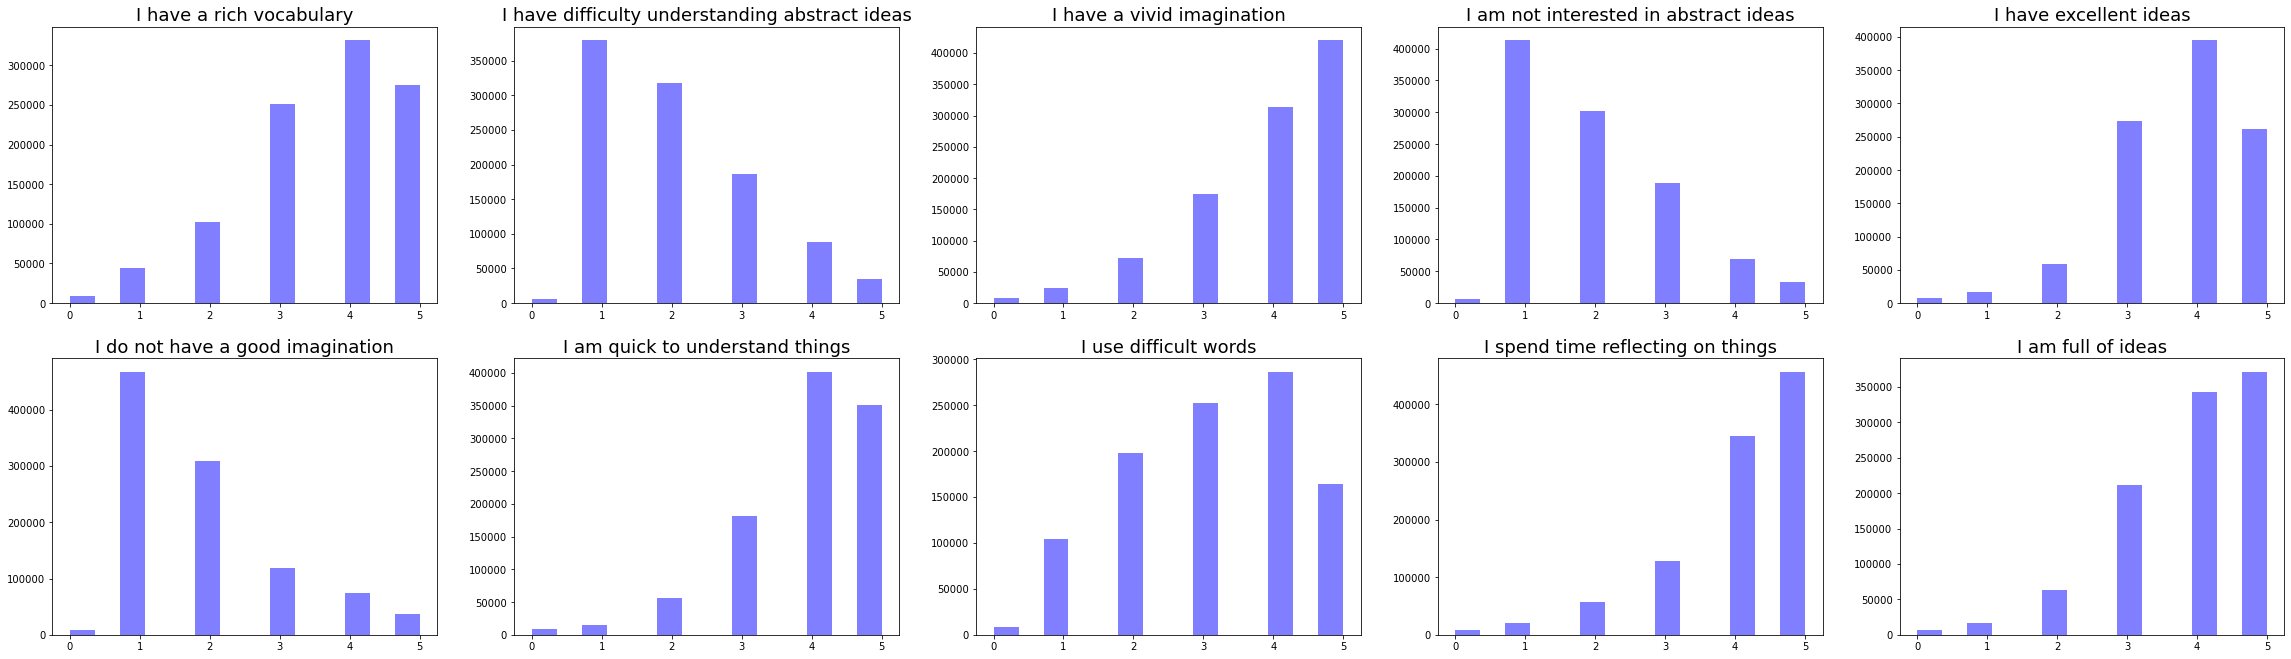

In [22]:
print('Q&As Related to Open Personality')
vis_questions(OPN, opn_questions, 'blue')

### dividing the values of column country be an computed valued drived by minmaxScalar  

In [23]:
# For ease of calculation lets scale all the values between 0-1 and take a sample of 5000 
from sklearn.preprocessing import MinMaxScaler

df = data.drop('country', axis=1)
columns = list(df.columns)

scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=columns)
df_sample = df[:5000]

### Yellowbrick provides the yellowbrick.cluster module to visualize and evaluate clustering behavior. Currently we provide several visualizers to evaluate centroidal mechanisms, particularly K-Means clustering, that help us to discover an optimal K

parameter in the clustering metric:

    Elbow Method: visualize the clusters according to some scoring function, look for an “elbow” in the curve.

    Silhouette Visualizer: visualize the silhouette scores of each cluster in a single model.

    Intercluster Distance Maps: visualize the relative distance and size of clusters.
 

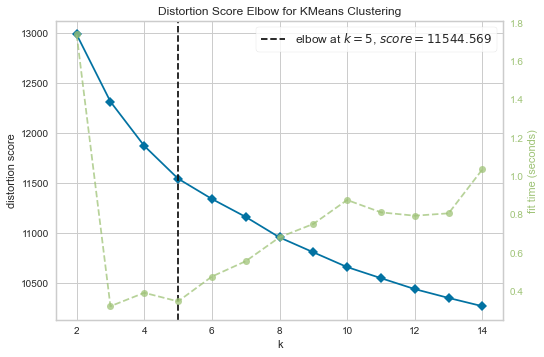

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
# Visualize the elbow
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,15))
visualizer.fit(df_sample)
visualizer.poof()

### K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

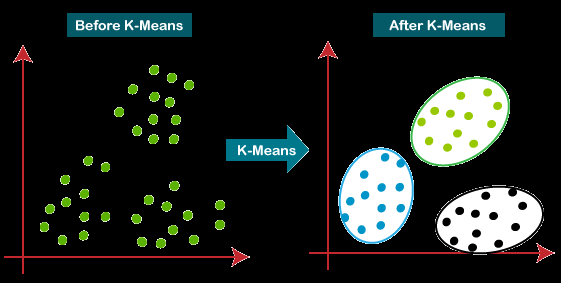

In [29]:
# Creating K-means Cluster Model
from sklearn.cluster import KMeans
# I use the unscaled data but without the country column
df_model = data.drop('country', axis=1)
# I define 5 clusters and fit my model
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df_model)

In [30]:
# Predicting the Clusters
pd.options.display.max_columns = 10
predictions = k_fit.labels_
df_model['Clusters'] = predictions
df_model.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,...,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.0,1.0,5.0,2.0,5.0,...,5.0,3.0,4.0,5.0,4
1,3.0,5.0,3.0,4.0,3.0,...,4.0,2.0,5.0,3.0,2
2,2.0,3.0,4.0,4.0,3.0,...,5.0,3.0,4.0,4.0,2
3,2.0,2.0,2.0,3.0,4.0,...,4.0,4.0,3.0,3.0,0
4,3.0,3.0,3.0,3.0,5.0,...,5.0,3.0,5.0,5.0,4


In [31]:
df_model.Clusters.value_counts()

3    227081
2    213137
4    209288
1    201135
0    162840
Name: Clusters, dtype: int64

In [32]:
pd.options.display.max_columns = 150
df_model.groupby('Clusters').mean()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.190211,3.284046,2.787331,3.401425,2.583499,2.761177,2.119307,3.520910,2.651124,3.784242,2.347488,3.615340,2.989210,2.915543,2.326443,2.018957,2.310513,1.931092,2.591323,2.252027,3.040217,2.918583,2.590709,2.753371,3.164094,2.631767,3.014008,2.835980,2.585084,2.968914,3.135237,2.837730,3.661392,2.418257,2.361109,2.749865,3.370535,2.521358,2.759758,3.334040,3.537135,1.976959,3.615746,2.058468,3.622077,2.042649,3.882750,3.115070,3.693558,3.667066
1,1.810824,3.623780,2.235141,4.053148,2.287633,3.189604,1.745728,4.067502,2.177866,4.473264,4.252572,2.457558,4.506461,2.144729,3.559291,3.862147,3.991265,3.762294,4.007120,3.932220,2.492142,3.338176,2.599031,3.813747,2.577299,3.830238,2.734184,3.414910,3.654953,3.050986,2.810481,3.351610,3.815825,3.472280,2.097780,3.494737,3.563676,3.039789,2.783807,3.311825,3.501459,2.381530,4.064250,2.136008,3.435031,2.085326,3.679260,3.178288,4.278674,3.724553
2,2.122311,3.310917,3.096558,3.663156,2.955658,2.710885,2.203906,4.002604,2.325767,4.133975,3.478622,3.097820,4.136813,2.619479,2.805693,2.764175,2.847328,2.407029,2.951346,2.689800,1.888682,3.934859,1.687947,4.347814,1.991273,4.137860,2.018856,3.979304,4.167901,3.719354,3.832066,2.234037,4.295134,2.017158,3.233901,2.079700,4.159006,2.017031,3.825591,3.886969,3.572191,2.135054,3.889526,2.063096,3.727382,1.968326,4.011096,2.981008,4.260950,3.812994
3,3.449078,1.916338,3.791370,2.507480,4.040162,1.833231,3.651270,2.770619,3.760953,3.003272,3.812521,2.926013,4.244349,2.412985,3.286792,3.467371,3.805946,3.456027,3.656744,3.172991,2.158701,4.271582,2.652890,4.183243,2.001189,3.999141,1.857782,3.897688,4.131460,3.844866,2.961261,3.598245,3.843100,3.230904,2.241451,3.515499,3.463271,2.824640,2.951612,3.481493,3.738455,2.118464,4.245771,1.967787,3.956527,1.772614,3.962331,3.373479,4.189399,4.199695
4,3.475402,1.939896,4.340029,2.215268,4.266513,1.663727,3.889463,2.805268,3.747033,2.510201,2.319732,3.822541,3.151738,3.283853,2.113399,1.898518,2.108869,1.675371,2.115515,1.717361,1.895230,4.431353,1.832919,4.244902,1.858582,3.844067,1.588629,4.096006,4.097707,4.194316,3.714623,2.581725,4.190417,1.898690,3.137108,2.282639,3.867957,1.936145,3.578394,3.874627,3.886233,1.752929,4.083340,1.793997,4.158858,1.653497,4.314638,3.236736,4.094898,4.296262


In [33]:
# Summing up the different questions groups
col_list = list(df_model)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extroversion'] = df_model[ext].sum(axis=1)/10
data_sums['neurotic'] = df_model[est].sum(axis=1)/10
data_sums['agreeable'] = df_model[agr].sum(axis=1)/10
data_sums['conscientious'] = df_model[csn].sum(axis=1)/10
data_sums['open'] = df_model[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
data_sums.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,2.908327,2.529794,2.850273,2.914928,3.121148
1,2.966449,3.647566,3.150567,3.174181,3.246438
2,3.052574,2.979811,3.187385,3.158059,3.242162
3,3.072377,3.424174,3.299854,3.211148,3.352452
4,3.085280,2.420690,3.208371,3.106233,3.327139


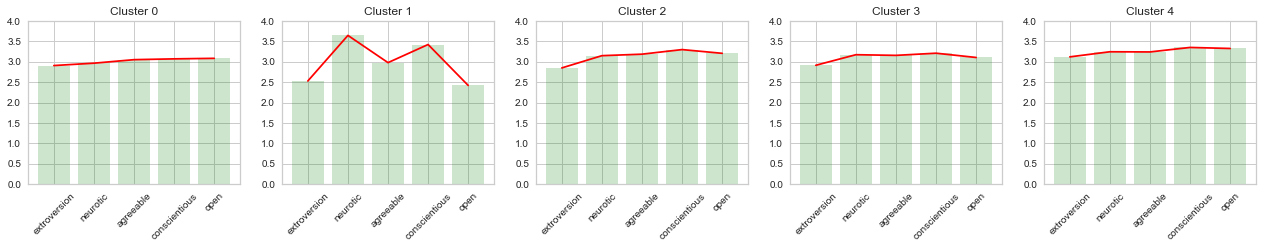

In [34]:
# Visualizing the means for each cluster
dataclusters = data_sums.groupby('clusters').mean()
plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(dataclusters.columns, dataclusters.iloc[:, i], color='green', alpha=0.2)
    plt.plot(dataclusters.columns, dataclusters.iloc[:, i], color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,4);

In [35]:
# In order to visualize in 2D graph I will use PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_model)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

,PCA1,PCA2,Clusters
0,-5.818315,-0.818314,4
1,0.503569,2.825067,2
2,-0.370128,2.158259,2
3,1.769566,0.475372,0
4,-4.855545,2.692607,4


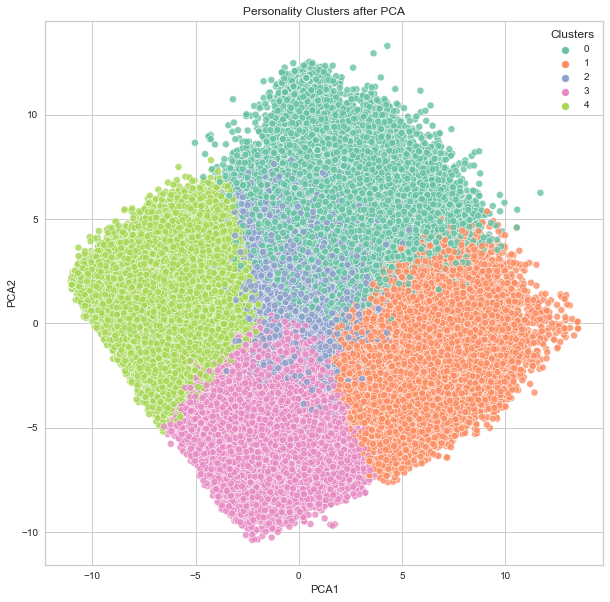

In [36]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA');

### some additional methods to figure out more about the model  

In [ ]:
learn_control = ReduceLROnPlateau(monitor='val_acc', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-7)

filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

history = model.fit_generator(
    train_generator.flow(x_train, y_train, batch_size=BATCH_SIZE),
    steps_per_epoch=x_train.shape[0] / BATCH_SIZE,
    epochs=20,
    validation_data=(x_val, y_val),
    callbacks=[learn_control, checkpoint]
)

### Performance Metrics 

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot()

history_df = pd.DataFrame(history.history)
history_df[['acc', 'val_acc']].plot()